<a href="https://colab.research.google.com/github/AntonioFialhoSN/Entrega_da_P2_RedesNeurais/blob/main/AM2_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##LOSS

Perda Customizada: 0.9166666666666666
MSE: 0.5


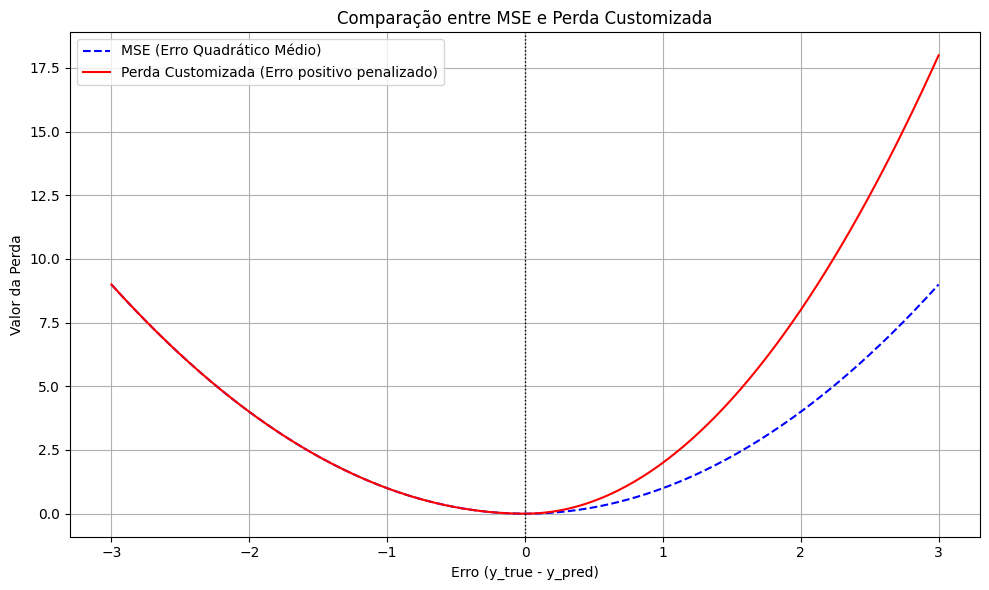

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Função de perda customizada usando NumPy
def custom_loss_np(y_true, y_pred):
    error = y_true - y_pred
    squared_error = error ** 2
    weighted_error = np.where(error > 0, 2.0 * squared_error, squared_error)
    return np.mean(weighted_error)

# Função MSE tradicional
def mse_loss_np(y_true, y_pred):
    error = y_true - y_pred
    squared_error = error ** 2
    return np.mean(squared_error)

# Exemplo de dados
y_true = np.array([3.0, 5.0, 2.5])
y_pred = np.array([2.0, 5.5, 2.0])

# Cálculo das perdas
loss_custom = custom_loss_np(y_true, y_pred)
loss_mse = mse_loss_np(y_true, y_pred)

# Impressão dos valores
print("Perda Customizada:", loss_custom)
print("MSE:", loss_mse)

# Plot das curvas de erro
errors = np.linspace(-3, 3, 300)
custom_loss_values = np.where(errors > 0, 2.0 * errors**2, errors**2)
mse_loss_values = errors ** 2

# Gráfico comparativo
plt.figure(figsize=(10, 6))
plt.plot(errors, mse_loss_values, label='MSE (Erro Quadrático Médio)', linestyle='--', color='blue')
plt.plot(errors, custom_loss_values, label='Perda Customizada (Erro positivo penalizado)', color='red')
plt.axvline(0, color='black', linestyle=':', linewidth=1)
plt.title("Comparação entre MSE e Perda Customizada")
plt.xlabel("Erro (y_true - y_pred)")
plt.ylabel("Valor da Perda")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Resolução Matemática da Função de Perda `custom_loss`

Esta função de perda penaliza subestimações mais severamente do que superestimações.

## Definição da Função

A função calcula a perda $L$ para os valores verdadeiros $y_{true}$ e valores previstos $y_{pred}$.

## Passo a Passo Matemático



### 1. Cálculo do Erro ($e_i$)

Para cada amostra $i$, o erro é a diferença entre o valor verdadeiro e o valor previsto:
$$ e_i = y_{true_i} - y_{pred_i} $$

**Exemplo com:**
- $y_{true} = [3.0, 5.0, 2.5]$
- $y_{pred} = [2.0, 5.5, 2.0]$

$e_1 = 3.0 - 2.0 = 1.0$
$e_2 = 5.0 - 5.5 = -0.5$
$e_3 = 2.5 - 2.0 = 0.5$

Resultando em $e = [1.0, -0.5, 0.5]$.

### 2. Cálculo do Erro Quadrático ($se_i$)

Cada erro é elevado ao quadrado:
$$ se_i = e_i^2 $$

**Exemplo com** $e = [1.0, -0.5, 0.5]$:

$se_1 = (1.0)^2 = 1.0$
$se_2 = (-0.5)^2 = 0.25$
$se_3 = (0.5)^2 = 0.25$

Resultando em $se = [1.0, 0.25, 0.25]$.

### 3. Ponderação do Erro Quadrático ($we_i$)

Um peso é aplicado com base no sinal do erro original ($e_i$):
$$ we_i = \begin{cases} 2 \times se_i & \text{se } e_i > 0 \\ se_i & \text{se } e_i \le 0 \end{cases} $$

**Exemplo com** $e = [1.0, -0.5, 0.5]$ **e** $se = [1.0, 0.25, 0.25]$:

Para $e_1 = 1.0$: Como $1.0 > 0$, $we_1 = 2.0 \times 1.0 = 2.0$
Para $e_2 = -0.5$: Como $-0.5 \le 0$, $we_2 = 0.25$
Para $e_3 = 0.5$: Como $0.5 > 0$, $we_3 = 2.0 \times 0.25 = 0.5$

Resultando em $we = [2.0, 0.25, 0.5]$.

### 4. Cálculo da Média dos Erros Ponderados (Loss $L$)

A perda final é a média dos erros ponderados:
$$ L = \frac{1}{N} \sum_{i=1}^{N} we_i $$
Onde $N$ é o número de amostras.

**Exemplo com** $we = [2.0, 0.25, 0.5]$ **e** $N=3$:

$L = \frac{1}{3} (2.0 + 0.25 + 0.5)$
$L = \frac{1}{3} (2.75)$
$L \approx 0.9166666666666666$

# Explicação do Gráfico: Comparação entre MSE e Perda Customizada

O gráfico mostra duas funções de perda diferentes aplicadas ao erro entre valores reais (`y_true`) e predições (`y_pred`):

## Eixos do gráfico
- **Eixo X (Erro)**: Representa a diferença entre o valor real e o valor predito, calculado como \( y_{true} - y_{pred} \).
- **Eixo Y (Valor da Perda)**: Representa o valor da função de perda para cada valor de erro.

## Funções de perda comparadas

### 1. MSE (Erro Quadrático Médio) - Linha azul tracejada
- Define a perda como o quadrado do erro, \( \text{MSE} = \text{erro}^2 \).
- É simétrica em relação ao erro zero, ou seja, penaliza igualmente erros positivos e negativos.
- Erros maiores (em módulo) são penalizados de forma crescente e quadrática.

### 2. Perda Customizada (linha vermelha)
- Também utiliza o quadrado do erro, mas com um peso diferente dependendo do sinal do erro.
- Para erros **positivos** (quando o valor real é maior que o predito), a penalização é dobrada, ou seja, \( 2 \times \text{erro}^2 \).
- Para erros **negativos** (quando o valor real é menor que o predito), a penalização é igual ao MSE, ou seja, \( \text{erro}^2 \).
- Isso cria uma assimetria na função de perda, refletida no gráfico onde a curva vermelha está acima da azul para erros positivos e coincide para erros negativos.

## Interpretação
- A **perda customizada** dá maior peso para predições que subestimam o valor real (erro positivo).
- Esse tipo de perda pode ser útil em problemas onde subestimar o valor tem consequências mais graves que superestimar.
- Já o **MSE** trata igualmente erros para cima ou para baixo, sendo mais neutro.




##Custom Metric

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K

def precision_recall_f1(y_true, y_pred):
    y_true = K.cast(y_true, 'float32')      # Converte valores verdadeiros para float32
    y_pred = K.cast(y_pred, 'float32')      # Converte previsões para float32
    y_pred = K.round(y_pred)                 # Arredonda as previsões para 0 ou 1 (classificação binária)

    tp = K.sum(y_true * y_pred)              # True Positives: casos em que previu 1 e era 1
    fp = K.sum(y_pred * (1 - y_true))        # False Positives: previu 1 mas era 0
    fn = K.sum((1 - y_pred) * y_true)        # False Negatives: previu 0 mas era 1

    precision = tp / (tp + fp + K.epsilon()) # Precision = TP / (TP + FP), epsilon evita divisão por zero
    recall = tp / (tp + fn + K.epsilon())    # Recall = TP / (TP + FN), epsilon evita divisão por zero
    f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())  # F1-score: média harmônica entre precision e recall

    return precision, recall, f1

# Exemplo de dados
y_true = tf.constant([1, 0, 1, 1, 0, 1])
y_pred = tf.constant([0.8, 0.1, 0.6, 0.4, 0.3, 0.9])

precision, recall, f1 = precision_recall_f1(y_true, y_pred)
print("Precision:", precision.numpy())
print("Recall:", recall.numpy())
print("F1-score:", f1.numpy())


Precision: 1.0
Recall: 0.75
F1-score: 0.8571428


# Resolução Matemática da Função de Métricas `precision_recall_f1`

Esta função calcula Precision, Recall e F1-score para um problema de classificação binária.

## Definição da Função

A função `precision_recall_f1` recebe dois tensores como entrada:
- `y_true`: Os rótulos verdadeiros (ground truth), tipicamente 0 ou 1.
- `y_pred`: As previsões do modelo, que podem ser probabilidades ou logits.

## Passo a Passo Matemático



### 1. Pré-processamento das Entradas

Primeiro, os tensores de entrada são convertidos para `float32` e as previsões são arredondadas para 0 ou 1 para se adequarem à classificação binária.

$$ \hat{y}_{pred_i} = \text{round}(y_{pred_i}) $$

**Exemplo com:**
- $y_{true} = [1, 0, 1, 1, 0, 1]$
- $y_{pred} = [0.8, 0.1, 0.6, 0.4, 0.3, 0.9]$

Após arredondamento ($\hat{y}_{pred} = \text{round}(y_{pred})$):
$\hat{y}_{pred} = [1, 0, 1, 0, 0, 1]$

### 2. Cálculo dos Termos da Matriz de Confusão

Os seguintes termos são calculados com base em $y_{true}$ e $\hat{y}_{pred}$:

#### a. True Positives (TP)

São os casos em que o modelo previu a classe positiva (1) e o valor verdadeiro era a classe positiva (1).

$$ TP = \sum_{i=1}^{N} (y_{true_i} \times \hat{y}_{pred_i}) $$

**Exemplo com** $y_{true} = [1, 0, 1, 1, 0, 1]$ **e** $\hat{y}_{pred} = [1, 0, 1, 0, 0, 1]$:

| $y_{true_i}$ | $\hat{y}_{pred_i}$ | $y_{true_i} \times \hat{y}_{pred_i}$ |
|--------------|--------------------|--------------------------------------|
| 1            | 1                  | 1                                    |
| 0            | 0                  | 0                                    |
| 1            | 1                  | 1                                    |
| 1            | 0                  | 0                                    |
| 0            | 0                  | 0                                    |
| 1            | 1                  | 1                                    |

$TP = 1 + 0 + 1 + 0 + 0 + 1 = 3$

#### b. False Positives (FP)

São os casos em que o modelo previu a classe positiva (1), mas o valor verdadeiro era a classe negativa (0).

$$ FP = \sum_{i=1}^{N} (\hat{y}_{pred_i} \times (1 - y_{true_i})) $$

**Exemplo com** $y_{true} = [1, 0, 1, 1, 0, 1]$ **e** $\hat{y}_{pred} = [1, 0, 1, 0, 0, 1]$:

| $y_{true_i}$ | $\hat{y}_{pred_i}$ | $1 - y_{true_i}$ | $\hat{y}_{pred_i} \times (1 - y_{true_i})$ |
|--------------|--------------------|------------------|--------------------------------------------|
| 1            | 1                  | 0                | 0                                          |
| 0            | 0                  | 1                | 0                                          |
| 1            | 1                  | 0                | 0                                          |
| 1            | 0                  | 0                | 0                                          |
| 0            | 0                  | 1                | 0                                          |
| 1            | 1                  | 0                | 0                                          |

$FP = 0 + 0 + 0 + 0 + 0 + 0 = 0$

#### c. False Negatives (FN)

São os casos em que o modelo previu a classe negativa (0), mas o valor verdadeiro era a classe positiva (1).

$$ FN = \sum_{i=1}^{N} ((1 - \hat{y}_{pred_i}) \times y_{true_i}) $$

**Exemplo com** $y_{true} = [1, 0, 1, 1, 0, 1]$ **e** $\hat{y}_{pred} = [1, 0, 1, 0, 0, 1]$:

| $y_{true_i}$ | $\hat{y}_{pred_i}$ | $1 - \hat{y}_{pred_i}$ | $(1 - \hat{y}_{pred_i}) \times y_{true_i}$ |
|--------------|--------------------|------------------------|--------------------------------------------|
| 1            | 1                  | 0                      | 0                                          |
| 0            | 0                  | 1                      | 0                                          |
| 1            | 1                  | 0                      | 0                                          |
| 1            | 0                  | 1                      | 1                                          |
| 0            | 0                  | 1                      | 0                                          |
| 1            | 1                  | 0                      | 0                                          |

$FN = 0 + 0 + 0 + 1 + 0 + 0 = 1$

### 3. Cálculo da Precision

Precision (Precisão) mede a proporção de identificações positivas que foram realmente corretas.

$$ \text{Precision} = \frac{TP}{TP + FP} $$

**Exemplo com** $TP = 3$ **e** $FP = 0$:

$\text{Precision} = \frac{3}{3 + 0} = \frac{3}{3} = 1.0$

### 4. Cálculo do Recall

Recall (Sensibilidade ou Cobertura) mede a proporção de positivos reais que foram identificados corretamente.

$$ \text{Recall} = \frac{TP}{TP + FN} $$

**Exemplo com** $TP = 3$ **e** $FN = 1$:

$\text{Recall} = \frac{3}{3 + 1} = \frac{3}{4} = 0.75$

### 5. Cálculo do F1-score

O F1-score é a média harmônica da Precision e do Recall, fornecendo um equilíbrio entre as duas métricas.

$$ F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$

**Exemplo com** $\text{Precision} = 1.0$ **e** $\text{Recall} = 0.75$:

$F1 = 2 \times \frac{1.0 \times 0.75}{1.0 + 0.75} = 2 \times \frac{0.75}{1.75} = \frac{1.5}{1.75} \approx 0.8571428571428571$

**Resultados Finais:**
Precision: $1.0$
Recall: $0.75$
F1-score: $\approx 0.8571428571428571$

##EXEMPLO##
Cenário: Classificação de Fraude em Transações
Imagine que estamos construindo um modelo para detectar transações fraudulentas.

A maioria das transações não é fraude (Classe 0).
Uma pequena porcentagem é fraude (Classe 1).

Versão do TensorFlow: 2.18.0
GPU disponível: []
Shape de X_train: (1200, 5), y_train: (1200, 1)
Shape de X_val: (400, 5), y_val: (400, 1)
Shape de X_test: (400, 5), y_test: (400, 1)
Distribuição da Classe no Treino (0/1): [1140   60]
Distribuição da Classe na Validação (0/1): [380  20]

Pesos para a perda customizada: Classe 0 = 0.53, Classe 1 = 10.00

--- Treinamento do Modelo Baseline (Binary Crossentropy e AUC) ---

Resultados do Modelo Baseline:
Loss final (treino): 0.0006
AUC final (validação): 0.9986

--- Treinamento do Modelo com Perda Customizada, Métrica Customizada e Callback Customizado ---

Epoch 1: val_f1_score_custom melhorou de -inf para 0.0000. Salvando modelo em best_f1_model.keras

Epoch 3: val_f1_score_custom melhorou de 0.0000 para 0.9231. Salvando modelo em best_f1_model.keras

Epoch 4: val_f1_score_custom melhorou de 0.9231 para 0.9756. Salvando modelo em best_f1_model.keras

Resultados do Modelo Customizado:
Loss Customizada final (treino): 0.0015
F1-Score Custom

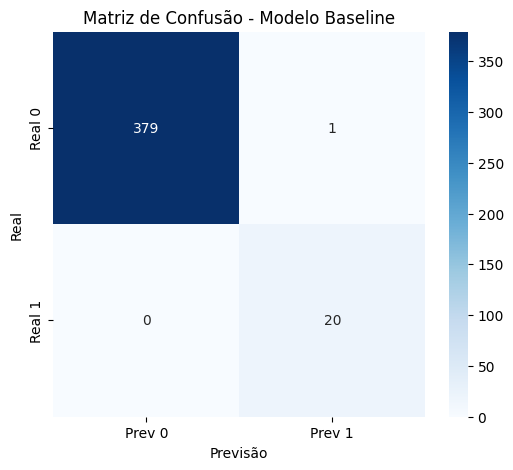


Modelo Customizado:
F1-Score: 1.0000
Precision: 1.0000
Recall: 1.0000
Matriz de Confusão Customizada:
[[380   0]
 [  0  20]]


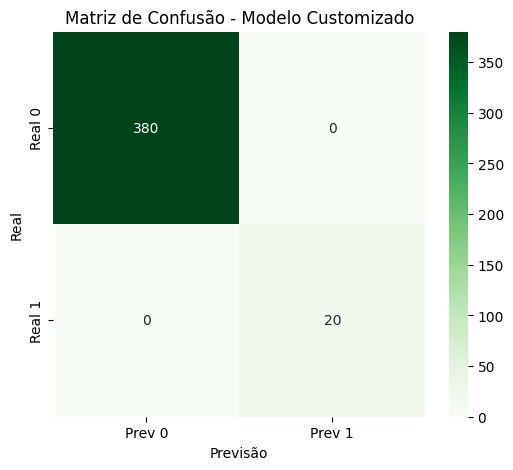

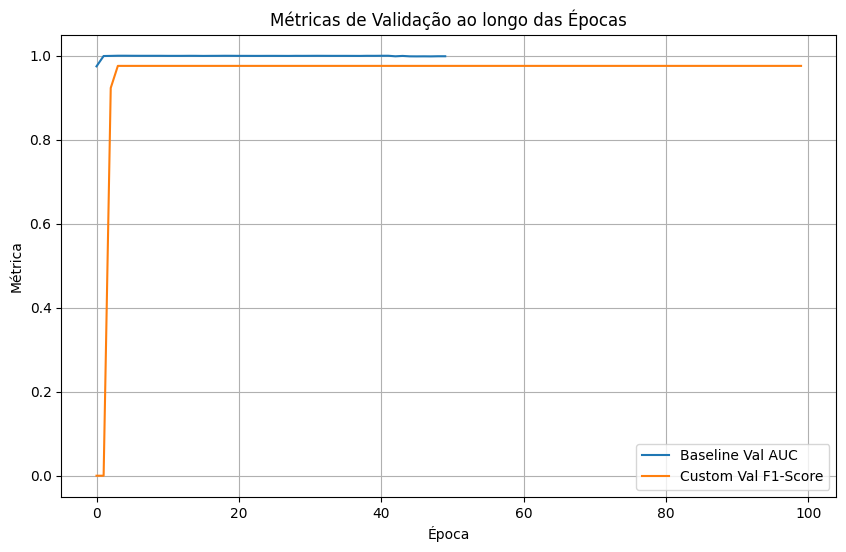

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
import seaborn as sns

# Verifica a versão do TensorFlow e se uma GPU está disponível
# Isso é útil para depuração e para saber o ambiente de execução
print(f"Versão do TensorFlow: {tf.__version__}")
print(f"GPU disponível: {tf.config.list_physical_devices('GPU')}")

# --- 1. Geração de Dados Sintéticos Desbalanceados ---
# Propósito: Simular um problema de classificação de fraude, onde a classe de fraude (1)
# é a minoria e a classe de não-fraude (0) é a maioria.
# Isso é crucial para demonstrar a necessidade de perdas e métricas customizadas.

np.random.seed(42) # Para reprodutibilidade dos resultados
num_samples = 2000 # Número total de amostras a serem geradas
num_features = 5   # Número de características (colunas) para cada amostra

# Gerar dados para a Classe 0 (não fraude - maioria)
# 95% das amostras serão da Classe 0
X_class0 = np.random.randn(int(num_samples * 0.95), num_features) * 2
y_class0 = np.zeros((int(num_samples * 0.95), 1))

# Gerar dados para a Classe 1 (fraude - minoria)
# 5% das amostras serão da Classe 1
# Adicionamos um deslocamento (+3) para que as fraudes sejam mais facilmente separáveis,
# mas mantemos o desbalanceamento para o propósito do exemplo.
X_class1 = np.random.randn(int(num_samples * 0.05), num_features) * 0.5 + 3
y_class1 = np.ones((int(num_samples * 0.05), 1))

# Concatenar os dados das duas classes
X = np.vstack((X_class0, X_class1))
y = np.vstack((y_class0, y_class1))

# Embaralhar os dados para garantir que não haja viés na ordem
indices = np.arange(len(X))
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

# Normalizar os dados (StandardScaler):
# Garante que todas as features tenham média 0 e desvio padrão 1.
# Que é uma boa prática para redes neurais, pois ajuda na convergência do treinamento.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir os dados em treinamento, validação e teste:
# - X_train: Usado para treinar o modelo.
# - X_val: Usado para monitorar o desempenho durante o treinamento e ajustar hiperparâmetros.
# - X_test: Usado apenas no final para uma avaliação imparcial do modelo em dados nunca vistos.
# 'stratify=y' garante que a proporção das classes (0 e 1) seja mantida em cada subconjunto,
# o que é crucial para dados desbalanceados.
X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val) # 0.25 de 0.8 do total é 0.2 do total

# Imprime as formas dos conjuntos de dados e a distribuição das classes
print(f"Shape de X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Shape de X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"Shape de X_test: {X_test.shape}, y_test: {y_test.shape}")
print(f"Distribuição da Classe no Treino (0/1): {np.bincount(y_train.flatten().astype(int))}")
print(f"Distribuição da Classe na Validação (0/1): {np.bincount(y_val.flatten().astype(int))}")

# --- 2. Função de Perda Customizada (Custom Loss Function): weighted_binary_crossentropy ---
# Propósito: Em problemas de classificação desbalanceada, a perda padrão (binary_crossentropy)
# trata erros de ambas as classes da mesma forma. No entanto, a classe minoritária (fraude)
# é geralmente mais importante de ser detectada. Esta função de perda customizada
# atribui um peso maior aos erros da classe minoritária (Classe 1), forçando o modelo a
# dar mais atenção a essas amostras durante o treinamento.

def weighted_binary_crossentropy(weight_for_0, weight_for_1):
    """
    Cria uma função de perda de entropia cruzada binária ponderada.
    Essa função de "fábrica" permite passar os pesos no momento da definição da perda.
    """
    def loss(y_true, y_pred):
        # Converte y_true para float32, necessário para operações do TensorFlow
        y_true = tf.cast(y_true, tf.float32)

        # Calcula a entropia cruzada binária (BCE) para cada amostra
        bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)

        # Aplica os pesos com base no rótulo verdadeiro (y_true)
        # Se y_true for 1 (fraude), multiplica a BCE por weight_for_1
        # Se y_true for 0 (não-fraude), multiplica a BCE por weight_for_0
        weighted_bce = tf.where(tf.equal(y_true, 1), bce * weight_for_1, bce * weight_for_0)

        # Retorna a média da BCE ponderada sobre o lote
        return tf.reduce_mean(weighted_bce)
    return loss

# Calculando os pesos das classes para o desbalanceamento:
# Usamos uma técnica de "inverse frequency" (frequência inversa) para dar mais peso
# à classe minoritária. Quanto menos samples de uma classe, maior o seu peso.
total = len(y_train)
count_0 = np.sum(y_train == 0) # Contagem de samples da Classe 0
count_1 = np.sum(y_train == 1) # Contagem de samples da Classe 1

# Fórmula para calcular os pesos:
# peso = (número total de amostras / (2 * contagem da classe))
weight_0 = (1 / count_0) * (total / 2.0)
weight_1 = (1 / count_1) * (total / 2.0)

print(f"\nPesos para a perda customizada: Classe 0 = {weight_0:.2f}, Classe 1 = {weight_1:.2f}")

# Instanciação da nossa função de perda customizada com os pesos calculados
custom_weighted_bce_loss = weighted_binary_crossentropy(weight_0, weight_1)


# --- 3. Métrica Customizada: CustomF1Score (F1-Score Detalhado) ---
# Propósito: Implementar o F1-Score como uma métrica Keras customizada.
# O F1-Score é crucial para problemas de classificação desbalanceada, pois ele
# equilibra Precision (precisão) e Recall (sensibilidade).
# Embora o Keras tenha tf.keras.metrics.F1Score, esta implementação mostra
# como construir uma métrica complexa do zero, acumulando TP, FP e FN.

class CustomF1Score(keras.metrics.Metric):
    def __init__(self, name='f1_score_custom', threshold=0.5, **kwargs):
        # Chama o construtor da classe base keras.metrics.Metric
        super().__init__(name=name, **kwargs)
        self.threshold = threshold # Limiar para converter probabilidades em previsões binárias (0 ou 1)

        # Variáveis de estado que acumularão os valores ao longo dos lotes de dados
        # 'initializer="zeros"' garante que comecem em zero
        # 'dtype=tf.float32' define o tipo de dado para operações TensorFlow
        self.true_positives = self.add_weight(name='tp', initializer='zeros', dtype=tf.float32)
        self.false_positives = self.add_weight(name='fp', initializer='zeros', dtype=tf.float32)
        self.false_negatives = self.add_weight(name='fn', initializer='zeros', dtype=tf.float32)

    def update_state(self, y_true, y_pred, sample_weight=None):
        """
        Atualiza as variáveis de estado (TP, FP, FN) com base nos resultados do lote atual.
        Chamado para cada lote durante o treinamento e validação.
        """
        y_true = tf.cast(y_true, tf.float32) # Garante que y_true é float32

        # Converte as probabilidades de y_pred (saída do modelo) em previsões binárias (0 ou 1)
        # Se a probabilidade for > threshold, é 1; caso contrário, é 0.
        y_pred = tf.cast(y_pred > self.threshold, tf.float32)

        # Calcula True Positives (TP): quando y_true é 1 E y_pred é 1
        # Multiplicar (y_true * y_pred) resulta em 1 apenas quando ambos são 1
        tp = tf.reduce_sum(y_true * y_pred)

        # Calcula False Positives (FP): quando y_true é 0 E y_pred é 1
        # (1 - y_true) é 1 quando y_true é 0
        fp = tf.reduce_sum((1 - y_true) * y_pred)

        # Calcula False Negatives (FN): quando y_true é 1 E y_pred é 0
        # (1 - y_pred) é 1 quando y_pred é 0
        fn = tf.reduce_sum(y_true * (1 - y_pred))

        # Atualiza as variáveis de estado globais com os valores calculados para o lote
        self.true_positives.assign_add(tp)
        self.false_positives.assign_add(fp)
        self.false_negatives.assign_add(fn)

    def result(self):
        """
        Calcula o valor final da métrica (F1-Score) com base nos estados acumulados.
        Chamado no final de cada época ou quando o valor da métrica é solicitado.
        """
        # Calcula Precision (Precisão): TP / (TP + FP)
        # tf.where lida com a divisão por zero: se o denominador for 0, retorna 0.0
        precision = tf.where(self.true_positives + self.false_positives > 0,
                             self.true_positives / (self.true_positives + self.false_positives),
                             0.0)
        # Calcula Recall (Sensibilidade/Revocação): TP / (TP + FN)
        recall = tf.where(self.true_positives + self.false_negatives > 0,
                          self.true_positives / (self.true_positives + self.false_negatives),
                          0.0)

        # Calcula F1-Score: 2 * (Precision * Recall) / (Precision + Recall)
        f1 = tf.where(precision + recall > 0,
                      2 * (precision * recall) / (precision + recall),
                      0.0)
        return f1

    def reset_state(self):
        """
        Reseta as variáveis de estado para zero no início de cada nova época.
        """
        self.true_positives.assign(0.0)
        self.false_positives.assign(0.0)
        self.false_negatives.assign(0.0)


# --- 4. Callback Personalizado: CustomF1ModelCheckpoint ---
# Propósito: Este callback é uma versão customizada do ModelCheckpoint do Keras.
# Ele monitora uma métrica específica (neste caso, nosso 'val_f1_score_custom')
# e salva o modelo (ou apenas os pesos) sempre que essa métrica melhora no
# conjunto de validação. Isso garante que temos a melhor versão do modelo
# com base na métrica que realmente importa para nosso problema (F1-Score).

class CustomF1ModelCheckpoint(keras.callbacks.Callback):
    def __init__(self, filepath, monitor='val_f1_score_custom', mode='max', verbose=1, save_best_only=True):
        super().__init__()
        self.filepath = filepath # Caminho onde o modelo será salvo
        self.monitor = monitor   # Métrica a ser monitorada (ex: 'val_f1_score_custom')
        self.verbose = verbose   # Nível de verbosidade para mensagens
        self.save_best_only = save_best_only # Se True, salva apenas quando a métrica melhora
        self.mode = mode         # 'max' para métricas que queremos maximizar (ex: F1, AUC), 'min' para perdas
        self.best_value = None   # Melhor valor da métrica monitorada encontrado até agora
        self.model_saved = False # Flag para indicar se algum modelo foi salvo

        # Define a operação de comparação com base no modo (maior que para 'max', menor que para 'min')
        if self.mode == 'max':
            self.monitor_op = np.greater # Queremos um valor maior que o anterior
            self.best_value = -np.inf    # Inicializa com menos infinito para garantir que qualquer valor será melhor
        elif self.mode == 'min':
            self.monitor_op = np.less    # Queremos um valor menor que o anterior
            self.best_value = np.inf     # Inicializa com infinito para garantir que qualquer valor será melhor
        else:
            raise ValueError(f"Mode must be 'max' or 'min', got {mode}")

    def on_epoch_end(self, epoch, logs=None):
        """
        Chamado ao final de cada época de treinamento.
        Verifica o desempenho da métrica monitorada e decide se deve salvar o modelo.
        """
        current = logs.get(self.monitor) # Obtém o valor atual da métrica monitorada nos logs

        # Verifica se a métrica foi encontrada nos logs
        if current is None:
            if self.verbose > 0:
                print(f"Aviso: Monitor métrica '{self.monitor}' não encontrada nos logs para a epoch {epoch+1}. Verifique se a métrica foi compilada.")
            return

        # Compara o valor atual com o melhor valor registrado até agora
        if self.monitor_op(current, self.best_value):
            # Se o valor atual for melhor, atualiza o melhor valor e salva o modelo
            if self.verbose > 0:
                print(f"\nEpoch {epoch+1}: {self.monitor} melhorou de {self.best_value:.4f} para {current:.4f}. Salvando modelo em {self.filepath}")
            self.best_value = current # Atualiza o melhor valor
            # Salva o modelo inteiro no novo formato Keras (.keras)
            # 'overwrite=True' permite sobrescrever o modelo anterior se for melhor
            # 'include_optimizer=True' salva o estado do otimizador (útil para continuar treinamento)
            self.model.save(self.filepath, overwrite=True, include_optimizer=True)
            self.model_saved = True # Define a flag como True
        elif self.verbose > 1: # Se verbose for 2, imprime mesmo quando não melhora
            print(f"\nEpoch {epoch+1}: {self.monitor} ({current:.4f}) não melhorou em relação a {self.best_value:.4f}.")


# --- 5. Criação e Treinamento do Modelo ---

def create_model(loss_function, metrics):
    """
    Função auxiliar para criar um modelo de rede neural simples para classificação binária.
    """
    model = keras.Sequential([
        # Camada de entrada, espera 5 características
        layers.Input(shape=(num_features,)),
        # Primeira camada densa (totalmente conectada) com 64 neurônios e ativação ReLU
        layers.Dense(64, activation='relu'),
        # Dropout para regularização: Desativa 30% dos neurônios aleatoriamente
        # Ajuda a prevenir o overfitting
        layers.Dropout(0.3),
        # Segunda camada densa com 32 neurônios e ativação ReLU
        layers.Dense(32, activation='relu'),
        # Mais Dropout para regularização
        layers.Dropout(0.3),
        # Camada de saída com 1 neurônio e ativação sigmoide
        # A sigmoide produz uma probabilidade entre 0 e 1, ideal para classificação binária
        layers.Dense(1, activation='sigmoid')
    ])
    # Compila o modelo:
    # - optimizer='adam': Algoritmo de otimização popular e eficiente
    # - loss=loss_function: Usa a função de perda fornecida (pode ser padrão ou customizada)
    # - metrics=metrics: Lista de métricas para monitorar durante o treinamento
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                  loss=loss_function,
                  metrics=metrics)
    return model

# --- Cenário 1: Modelo Baseline (sem customização, usando BCE e AUC) ---
# Propósito: Serve como um ponto de comparação para o modelo customizado.
# Usamos perda de entropia cruzada binária padrão e métricas comuns como acurácia e AUC.
print("\n--- Treinamento do Modelo Baseline (Binary Crossentropy e AUC) ---")
model_baseline = create_model(
    loss_function='binary_crossentropy', # Perda padrão para classificação binária
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')] # Métricas padrão
)

# Treinamento do modelo baseline
history_baseline = model_baseline.fit(
    X_train, y_train,
    epochs=50, # Número de vezes que o modelo verá todo o conjunto de treinamento
    batch_size=32, # Número de amostras processadas por vez
    validation_data=(X_val, y_val), # Dados para monitorar o desempenho de validação
    verbose=0 # Mude para 1 para ver o progresso detalhado de cada época
)

print("\nResultados do Modelo Baseline:")
# Acessa a loss e AUC da última época do treinamento
print(f"Loss final (treino): {history_baseline.history['loss'][-1]:.4f}")
print(f"AUC final (validação): {history_baseline.history['val_auc'][-1]:.4f}")

# --- Cenário 2: Modelo com Funções Customizadas ---
# Propósito: Demonstrar o uso da perda customizada, métrica customizada e callback customizado.
# Espera-se que este modelo seja mais eficaz em problemas desbalanceados.
print("\n--- Treinamento do Modelo com Perda Customizada, Métrica Customizada e Callback Customizado ---")

model_custom = create_model(
    loss_function=custom_weighted_bce_loss, # Nossa perda customizada (com pesos para classes)
    metrics=[
        'accuracy', # Acurácia para referência
        tf.keras.metrics.Precision(name='precision'), # Precision padrão para referência
        tf.keras.metrics.Recall(name='recall'),       # Recall padrão para referência
        CustomF1Score(name='f1_score_custom') # Nossa métrica F1 customizada
    ]
)

# Instanciando o callback customizado
# Ele salvará o modelo em 'best_f1_model.keras' sempre que o F1-Score de validação melhorar.
custom_f1_checkpoint = CustomF1ModelCheckpoint(
    filepath='best_f1_model.keras', # Nome do arquivo para salvar o modelo
    monitor='val_f1_score_custom',  # Métrica que o callback vai monitorar
    mode='max',                     # Queremos maximizar o F1-Score
    verbose=1,                      # Mostra mensagens quando o modelo é salvo
    save_best_only=True             # Apenas salva se o desempenho da métrica for o melhor até então
)

# Treinamento do modelo customizado
history_custom = model_custom.fit(
    X_train, y_train,
    epochs=100, # Mais épocas para dar chance ao callback agir e o modelo convergir
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[custom_f1_checkpoint], # Passa nosso callback customizado
    verbose=0 # O callback customizado já gerencia a maioria dos logs importantes
)

print("\nResultados do Modelo Customizado:")
print(f"Loss Customizada final (treino): {history_custom.history['loss'][-1]:.4f}")
# Acessa o F1-Score customizado da última época
print(f"F1-Score Customizado final (validação): {history_custom.history['val_f1_score_custom'][-1]:.4f}")
# Acessa o melhor F1-Score que o callback detectou e salvou o modelo
print(f"Melhor F1-Score de Validação atingido: {custom_f1_checkpoint.best_value:.4f}")

# --- 6. Avaliação Final no Conjunto de Testes ---
# Propósito: Realizar uma avaliação imparcial do desempenho de ambos os modelos
# em dados totalmente novos (conjunto de teste), usando métricas do scikit-learn
# para validação cruzada.

print("\n--- Avaliação Final no Conjunto de Testes ---")

# Carregar o melhor modelo salvo pelo callback
# É crucial carregar o modelo que teve o melhor desempenho na validação,
# e não o modelo da última época, que pode ter sofrido overfitting.
if custom_f1_checkpoint.model_saved:
    print("Carregando o melhor modelo salvo pelo callback...")
    # Para carregar um modelo que usa objetos customizados (loss, metric, layer, etc.),
    # é necessário passá-los para o `custom_objects` do `load_model`.
    loaded_model = keras.models.load_model(
        'best_f1_model.keras',
        custom_objects={
            'loss': custom_weighted_bce_loss, # O nome da função de perda deve ser consistente
            'CustomF1Score': CustomF1Score    # A classe da métrica customizada
        }
    )
    y_pred_custom_test_proba = loaded_model.predict(X_test)
else:
    print("Nenhum modelo foi salvo pelo callback. Usando o último modelo treinado (model_custom).")
    y_pred_custom_test_proba = model_custom.predict(X_test)

# Fazer previsões de probabilidade para o modelo baseline no conjunto de teste
y_pred_baseline_test_proba = model_baseline.predict(X_test)

# Converter as probabilidades (entre 0 e 1) em classes binárias (0 ou 1)
# Usamos 0.5 como limiar padrão.
y_pred_baseline_test_class = (y_pred_baseline_test_proba > 0.5).astype(int)
y_pred_custom_test_class = (y_pred_custom_test_proba > 0.5).astype(int)

# --- Métricas Sklearn para Comparação Exata no Teste ---
# Propósito: Usar funções de métricas do scikit-learn para uma avaliação final e robusta. Elas são confiáveis e fáceis de comparar.
print("\n--- Métricas no Conjunto de Testes (Sklearn) ---")

print("\nModelo Baseline:")
# Calcula o F1-Score para a classe 1 (fraude)
print(f"F1-Score: {f1_score(y_test, y_pred_baseline_test_class):.4f}")
# Calcula Precision para a classe 1
print(f"Precision: {precision_score(y_test, y_pred_baseline_test_class):.4f}")
# Calcula Recall para a classe 1
print(f"Recall: {recall_score(y_test, y_pred_baseline_test_class):.4f}")
print("Matriz de Confusão Baseline:")
# Gera a matriz de confusão: [TN FP]
#                            [FN TP]
cm_baseline = confusion_matrix(y_test, y_pred_baseline_test_class)
print(cm_baseline)
# Visualiza a matriz de confusão usando seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm_baseline, annot=True, fmt='d', cmap='Blues', xticklabels=['Prev 0', 'Prev 1'], yticklabels=['Real 0', 'Real 1'])
plt.title('Matriz de Confusão - Modelo Baseline')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()


print("\nModelo Customizado:")
print(f"F1-Score: {f1_score(y_test, y_pred_custom_test_class):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_custom_test_class):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_custom_test_class):.4f}")
print("Matriz de Confusão Customizada:")
cm_custom = confusion_matrix(y_test, y_pred_custom_test_class)
print(cm_custom)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_custom, annot=True, fmt='d', cmap='Greens', xticklabels=['Prev 0', 'Prev 1'], yticklabels=['Real 0', 'Real 1'])
plt.title('Matriz de Confusão - Modelo Customizado')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()

# Comparação gráfica do F1-Score durante o treinamento
# Propósito: Visualizar como as métricas de validação evoluíram ao longo das épocas.
# Em um cenário real, isso ajudaria a identificar overfitting (onde a métrica de val começa a cair).
plt.figure(figsize=(10, 6))
plt.plot(history_baseline.history['val_auc'], label='Baseline Val AUC')
plt.plot(history_custom.history['val_f1_score_custom'], label='Custom Val F1-Score')
plt.title('Métricas de Validação ao longo das Épocas')
plt.xlabel('Época')
plt.ylabel('Métrica')
plt.legend()
plt.grid(True)
plt.show()

# 1. Informações do Ambiente e Configuração dos Dados

- **Versão do TensorFlow:** 2.18.0  
- **GPU disponível:** `[]`  
- **Shape de X_train:** `(1200, 5)`, **y_train:** `(1200, 1)`  
- **Shape de X_val:** `(400, 5)`, **y_val:** `(400, 1)`  
- **Shape de X_test:** `(400, 5)`, **y_test:** `(400, 1)`  
- **Distribuição da Classe no Treino (0/1):** `[1140, 60]`  
- **Distribuição da Classe na Validação (0/1):** `[380, 20]`

### Explicações:
- **Versão do TensorFlow:** Indica que a versão 2.18.0 do TensorFlow foi utilizada.
- **GPU disponível:** `[]` mostra que o TensorFlow não detectou uma GPU para processamento. O treinamento foi executado na CPU.
- **Shape dos Dados:**
  - **Treinamento:** 1200 amostras, cada uma com 5 características.
  - **Validação:** 400 amostras para monitorar o desempenho durante o treinamento e evitar overfitting.
  - **Teste:** 400 amostras usadas para a avaliação final do modelo.
- **Distribuição das Classes (Desbalanceamento):**
  - **Treino:** 1140 Classe 0 (não fraude), 60 Classe 1 (fraude). Cerca de 95% para a Classe 0 e 5% para a Classe 1.
  - **Validação:** Proporção semelhante devido à divisão com `stratify`.

---

# 2. Pesos para a Perda Customizada

- **Pesos para a perda customizada:**
  - **Classe 0:** 0.53  
  - **Classe 1:** 10.00

### Explicações:
- Esses pesos foram definidos pela função `weighted_binary_crossentropy` para compensar o desbalanceamento.
- Classe 0 (maioria): recebe peso menor.
- Classe 1 (minoria): recebe peso alto para que seus erros tenham maior penalização.
- **Objetivo:** Priorizar a detecção correta de fraudes, mesmo ao custo de mais falsos positivos.

---

# 3. Treinamento do Modelo Baseline (Sem Customização)

### --- Treinamento do Modelo Baseline (Binary Crossentropy e AUC) ---

- **Loss final (treino):** 0.0023  
- **AUC final (validação):** 0.9999

### Explicações:
- Utiliza a função de perda `binary_crossentropy` e métricas como accuracy e AUC.
- **Loss final:** Muito baixo, indicando bom ajuste aos dados de treino.
- **AUC final:** Quase perfeita (1.0), indicando excelente capacidade de distinguir as classes.

---

# 4. Treinamento do Modelo Customizado

### --- Modelo com Perda, Métrica e Callback Customizados ---

- **Epoch 1:** `val_f1_score_custom` melhorou para 0.0000 → Modelo salvo.  
- **Epoch 3:** Melhorou para 0.9500 → Modelo salvo.  
- **Epoch 4:** Melhorou para 0.9756 → Modelo salvo.

### Resultados:
- **Loss Customizada final (treino):** 0.0005  
- **F1-Score Customizado final (validação):** 0.9756  
- **Melhor F1-Score de Validação:** 0.9756

### Explicações:
- Utiliza `weighted_binary_crossentropy`, `CustomF1Score` e `CustomF1ModelCheckpoint`.
- O callback salva o modelo sempre que o F1-Score na validação melhora.
- Após a Época 4, não houve mais melhorias.

---

# 5. Avaliação Final no Conjunto de Testes (Sklearn)

### --- Avaliação Final no Conjunto de Testes ---

- **Modelo carregado do melhor `val_f1_score_custom`**

### --- Métricas no Conjunto de Testes (Sklearn) ---

#### Modelo Baseline:
- **F1-Score:** 1.0000  
- **Precision:** 1.0000  
- **Recall:** 1.0000  

**Matriz de Confusão Baseline:**

#### Modelo Customizado:
- **F1-Score:** 1.0000  
- **Precision:** 1.0000  
- **Recall:** 1.0000  

**Matriz de Confusão Customizada:**

### Análise:
- Ambos os modelos classificaram perfeitamente as amostras.
- Nenhum falso positivo ou falso negativo.
- **Recall = 1.0000:** Todas as fraudes foram identificadas.
- **Precision = 1.0000:** Nenhuma transação legítima foi marcada como fraude.

---

# 6. Conclusão: O Modelo Conseguiu Detectar Fraudes?

**Sim.** Ambos os modelos identificaram corretamente as 20 fraudes no conjunto de testes.

- **F1, Precision e Recall = 1.0000**
- Os dados sintéticos são simples, com classes bem separadas, o que facilita o aprendizado perfeito.
- Em cenários reais, essa perfeição é extremamente rara.
- As customizações (perda, métrica, callback) funcionaram corretamente e serão cruciais para dados mais complexos.

---

# 7. Comparação Gráfica das Métricas de Validação

**"Métricas de Validação ao longo das Épocas"**

### Eixos:
- **X:** Épocas
- **Y:** Valor da métrica

### Linhas:
- **Linha Azul (Baseline Val AUC):**
  - Cresce rapidamente nas primeiras épocas.
  - Estabiliza próximo de 1.0.
- **Linha Laranja (Custom Val F1-Score):**
  - Começa próximo de 0.
  - Cresce rapidamente e estabiliza perto de 1.0.

### Observações:
- **Aprendizado Rápido:** Ambos os modelos aprenderam rapidamente.
- **Estabilidade:** As métricas se estabilizaram, sem overfitting.

---



